<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/Iris_data_experimet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [40]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# Import Keras modules
#
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
#
# Create the network
#
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(4,)))
network.add(layers.Dense(3, activation='softmax'))
#
# Compile the network
#
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#
# Load the iris dataset
#
iris = datasets.load_iris()

df = pd.DataFrame(data = iris.data)

# add outcome variable
df['class'] = iris.target

X = np.matrix(df.loc[:, [0, 1, 2, 3]])
y = np.array(df['class'])
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

val_labels = to_categorical(y_val)
#
# Fit the neural network
#
history = network.fit(X_train, train_labels, epochs=30, batch_size=40,validation_data=(X_val, val_labels))

Epoch 1/30
3/3 [==============================] - 1s 87ms/step - loss: 1.0703 - accuracy: 0.3958 - val_loss: 0.8949 - val_accuracy: 0.6250
Epoch 2/30
3/3 [==============================] - 0s 16ms/step - loss: 0.8516 - accuracy: 0.6771 - val_loss: 0.8324 - val_accuracy: 0.7083
Epoch 3/30
3/3 [==============================] - 0s 19ms/step - loss: 0.7936 - accuracy: 0.6458 - val_loss: 0.7579 - val_accuracy: 0.7083
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 0.7304 - accuracy: 0.8646 - val_loss: 0.8023 - val_accuracy: 0.6250
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 0.6982 - accuracy: 0.6771 - val_loss: 0.6772 - val_accuracy: 0.8333
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 0.6498 - accuracy: 0.7708 - val_loss: 0.6543 - val_accuracy: 0.6667
Epoch 7/30
3/3 [==============================] - 0s 13ms/step - loss: 0.6177 - accuracy: 0.7708 - val_loss: 0.6165 - val_accuracy: 0.9583
Epoch 8/30
3/3 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


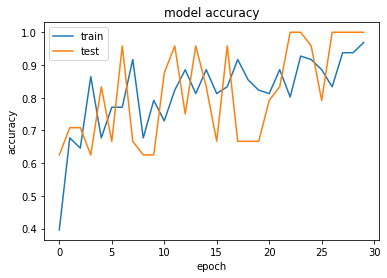

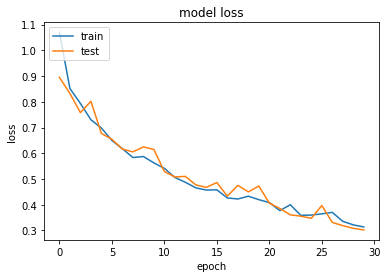

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = network.evaluate(X_test, test_labels)
#
# Print the test accura0cy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1/1 [==============================] - 0s 18ms/step - loss: 0.3219 - accuracy: 0.9333
Test Accuracy:  0.9333333373069763 
Test Loss:  0.32186582684516907


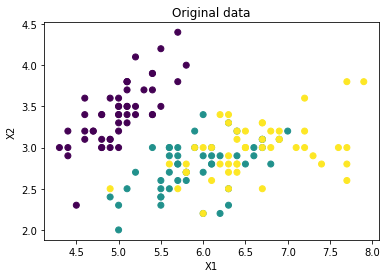

In [43]:
# Generate scatter plot for training data
plt.scatter(iris.data[:,0], iris.data[:,1],c=iris.target)
plt.title('Original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [44]:
y_hats = network.predict(df.loc[:, [0, 1, 2, 3]])
classes_x=np.argmax(y_hats,axis=1)

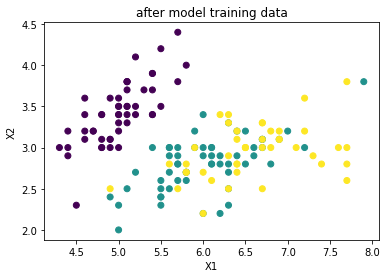

In [45]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=classes_x)
plt.title('after model training data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
#bining the data

In [48]:
df.describe()

,0,1,2,3,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [56]:
bins_0 = [0, 1, 2, 3, 4, 5, 6,7,8,9, 10]
bins_1 = [0, 1, 2, 3, 4]
bins_2 = [0, 1, 2, 3, 4, 5, 6,7]
bins_3 = [0, 1, 2, 3]
labels_0 = [0, 1, 2, 3, 4, 5, 6,7,8,9]
labels_1 = [0, 1, 2, 3, 4, 5, 6,7,8,9]
labels_2 = [0, 1, 2, 3, 4, 5, 6,7,8,9]
labels = [0, 1, 2, 3, 4, 5, 6,7,8,9]
df['binned_0'] = pd.cut(iris.data[:,0], bins_0,labels=labels)
df['binned_1'] = pd.cut(iris.data[:,0], bins_1,labels=labels)
df['binned_2'] = pd.cut(iris.data[:,0], bins_2,labels=labels)
df['binned_3'] = pd.cut(iris.data[:,0], bins_3,labels=labels)
print(df)

ValueError: ignored